In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
fname = "up-down.txt"
data = genfromtxt(fname, skip_header =10, usecols= (1,2,3), dtype=['|U50', '|U50', float], delimiter = "|", unpack=True)
labels, values, t = list(zip(*data))
labels = array(labels)
t = (array(t) - t[0]) / 1000.
values = array(values)

In [3]:
# get sensor names 
sensors = []
for l in labels:
    if not(l in sensors):
        sensors.append(l)
sensors = list(filter(lambda a: a != "3-axis Uncalibrated Gyroscope", sensors))
print(sensors)

['3-axis Gyroscope', 'Game Rotation Vector', 'Linear Acceleration', 'Gravity', '3-axis Accelerometer']


In [4]:
#separate values into each sensor
sep_values_as_string = []
ts = []
for i in arange(len(sensors)):
    mask = labels == sensors[i]
    sep_values_as_string.append(values[mask])
    ts.append(t[mask])

sep_values =[]
for i in arange(len(sep_values_as_string)):
    newer_array = []
    for j in arange(len(sep_values_as_string[i])):
        #remove brackets
        s = sep_values_as_string[i][j][1:-1]
        s_array = array(s.split(","))
        
        newer_array.append(s_array.astype("float"))
    sep_values.append(newer_array)


Text(0.5,1,'Gravity')

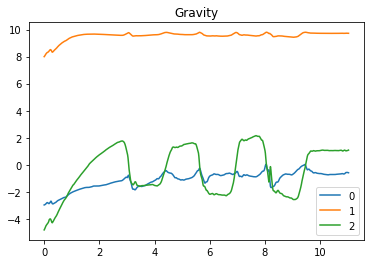

In [5]:
# Gravity
index = sensors.index('Gravity')
t = ts[index]
for i, a in enumerate(array(sep_values[index]).T):
    plot(t, a, label = i)
legend()
title(sensors[index])

Text(0.5,1,'3-axis Accelerometer')

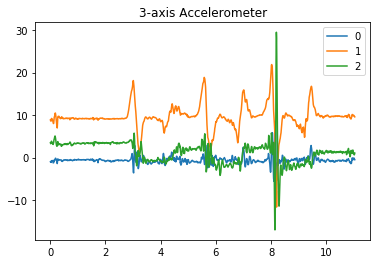

In [6]:
# 3-axis Accelerometer
index = sensors.index('3-axis Accelerometer')
t = ts[index]
for i, a in enumerate(array(sep_values[index]).T):
    plot(t, a, label = i)
legend()
title(sensors[index])

Text(0.5,1,'Linear Acceleration')

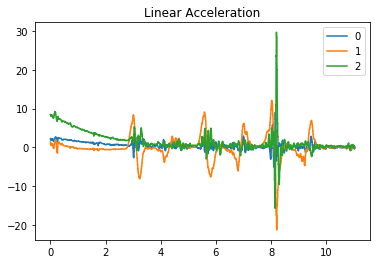

In [7]:
# Linear Acceleration
index = sensors.index('Linear Acceleration')
t = ts[index]

for i, a in enumerate(array(sep_values[index]).T):
    plot(t, a, label = i)
legend()
title(sensors[index])

Text(0.5,1,'3-axis Gyroscope')

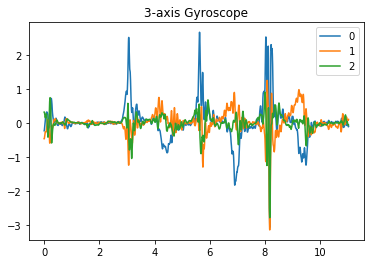

In [8]:
#3-axis Gyroscope
index = sensors.index('3-axis Gyroscope')
t = ts[index]

for i, a in enumerate(array(sep_values[index]).T):
    plot(t, a, label = i)
legend()
title(sensors[index])

Text(0.5,1,'Game Rotation Vector')

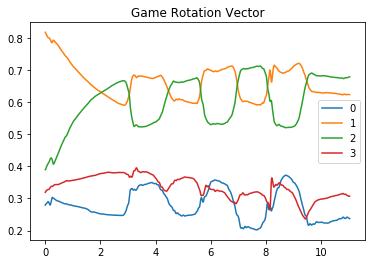

In [9]:
# Game Rotation Vector
index = sensors.index('Game Rotation Vector')
t = ts[index]
for i, a in enumerate(array(sep_values[index]).T):
    plot(t, a, label = i)
legend()
title(sensors[index])

In [33]:
def integrate(t, data):
    s = 0
    new_data = zeros(len(data))
    for i in arange(len(data) - 1):
        s += data[i] * (t[i+1] - t[i])
        new_data[i] = s
    new_data[-1] = s
    return new_data

Text(0.5,1,'3-axis Gyroscope Integration')

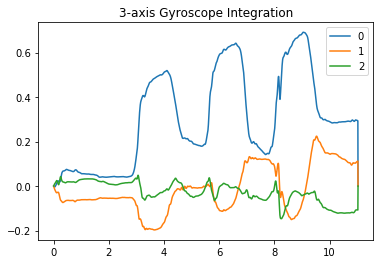

In [11]:
# integrate gyro
index = sensors.index('3-axis Gyroscope')
t = ts[index]

for i, a in enumerate(array(sep_values[index]).T):
    plot(t, integrate(t, a), label = i)
legend()
title(sensors[index] + " Integration")

Text(0.5,1,'Linear Acceleration Integration')

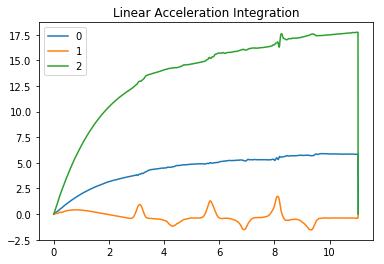

In [12]:
index = sensors.index('Linear Acceleration')
t = ts[index]

for i, a in enumerate(array(sep_values[index]).T):
    plot(t, integrate(t, a), label = i)
legend()
title(sensors[index] + " Integration")

Text(0.5,1,'Linear Acceleration Double Integration')

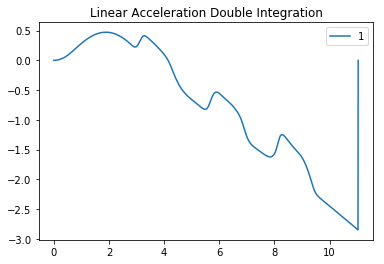

In [13]:
index = sensors.index('Linear Acceleration')
t = ts[index]

for i, a in enumerate(array(sep_values[index]).T):
    if i == 1:
        plot(t, integrate(t, integrate(t, a)),label = i)
legend()
title(sensors[index] + " Double Integration")

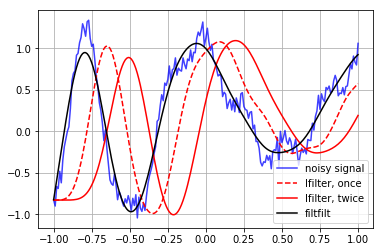

In [16]:
from scipy import signal

t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.08

b, a = signal.butter(3, 0.05)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, xn)
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


Text(0.5,1,'Linear Acceleration Integration')

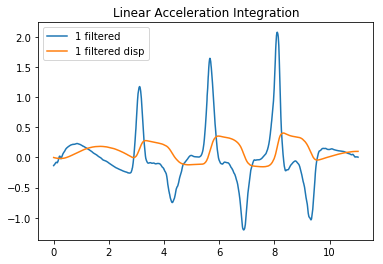

In [41]:
index = sensors.index('Linear Acceleration')
t = ts[index]

order = 3
srate = 200
ny = srate / 2
f = .2
wn = f / ny
b, a = signal.butter(order, wn, btype = "highpass")
zi = signal.lfilter_zi(b, a)

for i, datas in enumerate(array(sep_values[index]).T):
    if i == 1:
    #plot(t, integrate(t, datas), label = i)
        plot(t, signal.filtfilt(b, a, integrate(t, datas)), label = str(i) + " filtered")
        plot(t, integrate(t, signal.filtfilt(b, a, integrate(t, datas))), label = str(i) + " filtered disp")
    legend()
title(sensors[index] + " Integration")